In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

Data Generation
===

In [2]:
from numpy.random import rand, randn

In [3]:
n, d, k = 100, 2, 2

In [4]:
np.random.seed(20)
X = rand(n, d)

# means = [rand(d)  for _ in range(k)]  # works for any k
means = [rand(d) * 0.5 + 0.5 , - rand(d)  * 0.5 + 0.5]  # for better plotting when k = 2

S = np.diag(rand(d))

sigmas = [S]*k # we'll use the same Sigma for all clusters for better visual results

print(means)
print(sigmas)

[array([0.69872366, 0.75176984]), array([0.25997411, 0.14504062])]
[array([[0.01764816, 0.        ],
       [0.        , 0.06360523]]), array([[0.01764816, 0.        ],
       [0.        , 0.06360523]])]


Solution
===

In [49]:
def compute_p(x, mean, sigma):
    constant = 1 / ((np.pi)**(x.shape[0]) * np.linalg.det(sigma)**0.5 )   
        
    dot1 =  np.dot( (x - mean),  np.linalg.inv(sigma) )
    print(dot1.shape)
    dot2 = np.dot(dot1, (x-mean).T)
    print(dot2.shape)
    
    return constant * np.exp( (-1/2) * dot2)

In [50]:
def compute_log_p(X, mean, sigma):
    ''' fill your code in here...
    '''
    p1 = compute_p(X, mean, sigma)
    p2 = compute_p(X, mean, sigma)
    
    # a_n = np.argmax([p1, p2])
    # if a_n != 1 or a_n != 2:
        # raise RuntimeError("No best likelihood was found")
    return [p1, p2]

In [51]:
log_ps = [compute_log_p(X, m, s) for m, s in zip(means, sigmas)]  # exercise: try to do this without looping

(100, 2)
(100, 100)
(100, 2)
(100, 100)
(100, 2)
(100, 100)
(100, 2)
(100, 100)


In [52]:
assignments = np.argmax(log_ps, axis=0)
print(assignments)

[[[0 0 1 ... 1 0 0]
  [0 0 0 ... 0 0 0]
  [1 0 1 ... 1 0 0]
  ...
  [1 0 1 ... 1 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 1 ... 1 0 0]
  [0 0 0 ... 0 0 0]
  [1 0 1 ... 1 0 0]
  ...
  [1 0 1 ... 1 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not [[['red' 'red' 'green' ... 'green' 'red' 'red']
  ['red' 'red' 'red' ... 'red' 'red' 'red']
  ['green' 'red' 'green' ... 'green' 'red' 'red']
  ...
  ['green' 'red' 'green' ... 'green' 'red' 'red']
  ['red' 'red' 'red' ... 'red' 'red' 'red']
  ['red' 'red' 'red' ... 'red' 'red' 'red']]

 [['red' 'red' 'green' ... 'green' 'red' 'red']
  ['red' 'red' 'red' ... 'red' 'red' 'red']
  ['green' 'red' 'green' ... 'green' 'red' 'red']
  ...
  ['green' 'red' 'green' ... 'green' 'red' 'red']
  ['red' 'red' 'red' ... 'red' 'red' 'red']
  ['red' 'red' 'red' ... 'red' 'red' 'red']]]

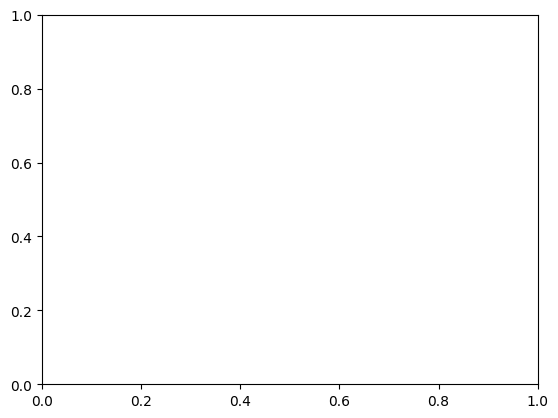

In [53]:
colors = np.array(['red', 'green'])[assignments]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker='*', s=200)
plt.show()